# Assignment 1

Kevin Martin <br>
Syracuse University <br>
CIS663 Wednesday @ 9:00pm EST

## Question 1
For Question 1, I will import the data into a pandas' dataframe and then modify it with various Python libraries. See below the dataframe implementation, which shows 405 records (rows) and 2 columns.

In [8]:
# data setup
import pandas as pd
data = pd.read_csv('./s048r_2_2_2.txt', sep='\t', header=None)
data.head

<bound method NDFrame.head of                 0         1
0    test.subject  test.out
1            s048      s025
2            s048      s025
3            s048      s038
4            s048      s048
..            ...       ...
400          s031      s051
401          s010      s010
402          s034      s031
403          s039      s039
404          s057      s008

[405 rows x 2 columns]>

## 1a.
For the confusion matrix, I will encode a result of "s048" as 1 (positive) and anything else as 0 (negative).

In [9]:
data.drop([data.index[0]],inplace=True)
data.head

<bound method NDFrame.head of         0     1
1    s048  s025
2    s048  s025
3    s048  s038
4    s048  s048
5    s048  s037
..    ...   ...
400  s031  s051
401  s010  s010
402  s034  s031
403  s039  s039
404  s057  s008

[404 rows x 2 columns]>

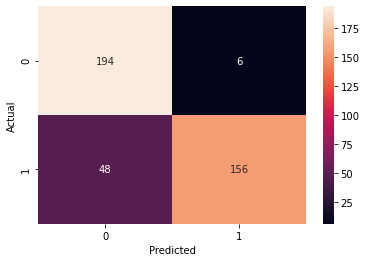

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data[0] = np.where(data[0] == 's048', 1, 0)
data[1] = np.where(data[1] == 's048', 1, 0)
actual = pd.Series(data[0], name='Actual')
predicted = pd.Series(data[1], name='Predicted')
conf_matrix = pd.crosstab(actual, predicted)
sns.heatmap(conf_matrix, annot=True, ax = plt.subplot(), fmt='g')

## 1b.

The accuracy for this model is 86.7%, as show below. To calculate, I used the accuracy_score function which comes with the scikit-learn pacakge metrics. It is a very quick and easy way to find the accuracy, but it also has the added benefit of using the exact same variables I used for creating the confusion matrix. This creates a less error prone result.

I believe accuracy is a useful measure for this model. First, with (generally) any model, accuracy should be taken into consideration. It's a quick and easy benchmark to look at it, but it can help add color to the problem. However, I would immediately caveat this statement by saying accuracy should not be the **only** metric used to evaluate performance. Accuracy can be skewed for a variety of reasons, and in some cases may not even be the most important metric. Things like precsion and recall should also, at the very least, be considered.

Another potential issue is unbalanced data. Say for example the dataset has 90% of all test cases being in the positive. A model assigning a positive value to every case would score 90% accuracy. This is obviously not a good result, nor telling of the model's performance. In the case of dataset s048r_2_2_2.txt, we can see below that the data is relatively balanced. About 150 positive, and about 240 negative. While not a perfect 50/50 split, it is a good enough split to allow the model to learn and develop correct patterns.

In [16]:
# accuracy
from sklearn.metrics import accuracy_score
print("The accuracy is: ","{0:.1%}".format(accuracy_score(actual, predicted)))

The accuracy is:  86.6%


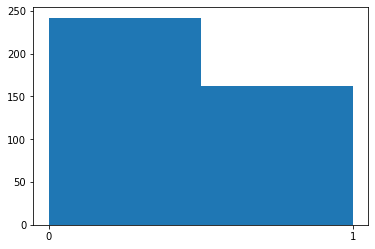

In [17]:
# balance check
plt.hist(predicted, bins=2)
plt.xticks(range(0, 2))
plt.show()

## 1c.
In order to calculate FMR and FNMR, I used the same correlation matrix as before. This made it easy to select just the cells I needed for false positives, true positives, true negatives, and false negatives. Then I could drop those into their respective formulas to compute.

For recall and precision, I once again leaned on scikit-lear for more of the metrics functinos. Both are already pre-built into the API, and I used the same variables as before to make it consistent. Please see cell below for results.

In [18]:
# FMR, FNMR, Precision, Recall
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
FP = conf_matrix[0][1]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]

FMR = FP/(FP+TN)
FNMR = FN/(TP+FN)

print("The FMR is: ", "{0:.1%}".format(FMR))
print("The FNMR is: ", "{0:.1%}".format(FNMR))
print("The recall is: ","{0:.1%}".format(recall_score(actual, predicted)))
print("The precision is: ","{0:.1%}".format(precision_score(actual, predicted)))

The FMR is:  19.8%
The FNMR is:  3.7%
The recall is:  76.5%
The precision is:  96.3%


# Question 2

## 2a.

Singularities are used in fingerprint recognition to help match two sets of fingerprints. By using the core or landmark of a fingerprint, two samples can be aligned in order to detect if a match is present. Singularites are generally classified into three topologies: loop, delta, and whorl. This is useful because each can be mathematically derived based on the orientation of the ridges and minutiae of a given sample

## 2b.

The thinning process in fingerprint feature extraction is the reduction in pixels of an already binarized image. In the traditional minutiae detection method, it is an optimal third step. The general approach would first be to convert a color image into grayscale. Next, binarize that image, where all the color values are replaced by a 1 or 0, depending on a user-defined threshold. Third, optionally, reduce the ridge-line thickness to one pixel (the **thinning** step). Fourth, detect minutiae. 

The benefit of thinning process is that it can reduce blotchiness or hard to identify ridges on an image. By forcing each ridge to be only one pixel, the ridges are clear and easier to identify. For the purposes of minutiae detection, we are more interested in objective angles for mathematical calcuations, rather than crystal clear images that would be preferable to only the human eye. As such, thinning can help objectify the process.

## 2c.

We need to find local ridge orientation and frequency earlier on in the processing of fingerprint images because it helps guide the rest of the analysis. It helps to line up the image correctly, so that we can begin to identify the singularities and then ultimately the minutiae. Without getting the orientation set early, angel calculation could be incorrect, and subsequent feature extractions and matching may be impaired.

# Question 3

For Question 3, I converted the given Theta values of k into a short method. Next, I found the little delta (delta1) and big delta (delta2) for each. Finally, I summed up all the big theta values to determine the singularity type. As shown below, the total big theta was 180, which indicated a loop.

In [14]:
pi = 180 # Theta is in radians
def theta(k):
    if k == 0:
        return 80
    elif k == 1:
        return 90
    elif k == 2:
        return 260
    elif k == 3:
        return 50
    elif k == 4:
        return 110
    elif k == 5:
        return 270
    elif k == 6:
        return 130
    elif k == 7:
        return 180

def delta1(k,N):
    tmp = theta((k+1)%N)
    tmp2 = theta(k)
    return tmp - tmp2

def delta2(k,N):
    if abs(delta1(k,N)) < pi / 2:
        return delta1(k,N)
    elif delta1(k,N) <= -pi / 2:
        return (delta1(k,N) + pi)
    elif delta1(k,N) >= pi / 2:
        return (delta1(k,N) - pi)

N = 8
delta_k = 0
for i in range(8):
    print("k = ", i)
    print("Little delta: ", delta1(i,N))
    delt_tmp = delta2(i,N)
    delta_k = delta_k + delt_tmp
    print("Big delta: ", delt_tmp)
    
print("Delta K sum is: ",delta_k)

k =  0
Little delta:  10
Big delta:  10
k =  1
Little delta:  170
Big delta:  -10
k =  2
Little delta:  -210
Big delta:  -30
k =  3
Little delta:  60
Big delta:  60
k =  4
Little delta:  160
Big delta:  -20
k =  5
Little delta:  -140
Big delta:  40
k =  6
Little delta:  50
Big delta:  50
k =  7
Little delta:  -100
Big delta:  80
Delta K sum is:  180


In [15]:
def singularity_type(delt_k):
    if delt_k == 360:
        return "whorl"
    elif delt_k == 180:
        return "loop"
    elif delt_k == -180:
        return "delta"
    elif delt_k == 0:
        return "singularity"
    else:
        print("No type detected")

print(singularity_type(delta_k))

loop


# Question 4

For this question, I built a little grid in Excel, starting in A1 (cell A3 is actually b0, the bottom left square), and made the values 0 for white and 1 for black, as seen here demonstrating a bifurcation:


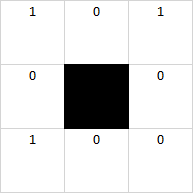

Then I used the below formula to make sure the values added up to the correct crossing numbers, 3 for bifurcation and 2 for non-minutiae:

=0.5*(ABS(A3-A2)+ABS(A2-A1)+ABS(A1-B1)+ABS(B1-C1)+ABS(C1-C2)+ABS(C2-C3)+ABS(C3-B3)+ABS(B3-A3))

I just toggled the numbers in the grid to make sure I had the correct values. Completed grids shown for each respective question, with white being 0 and 1 being black.

## 4a.

For a bifurcation point, all values are 0 excpet for b0, b2, and b4. The Crossing Number is 3:

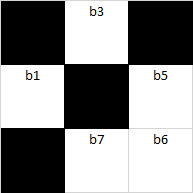

## 4b.

For a non-minutiae point, all values are 0 except for b0 and b2. The Crossing Number is 2:


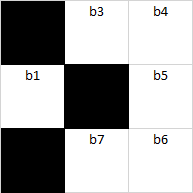

# Question 5

For question 5, I used Excel again to create a formulaic approach. First, I recreated the given grid so I could operate on each value:

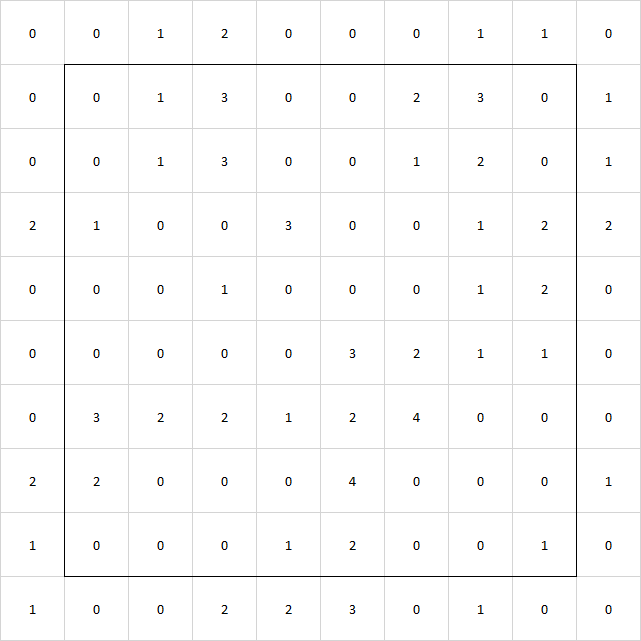



The "threshold" is a reference to a cell outside the grid, so I can simply change that one cell and the formula will binarize the grid. Here's a sample from Excel:

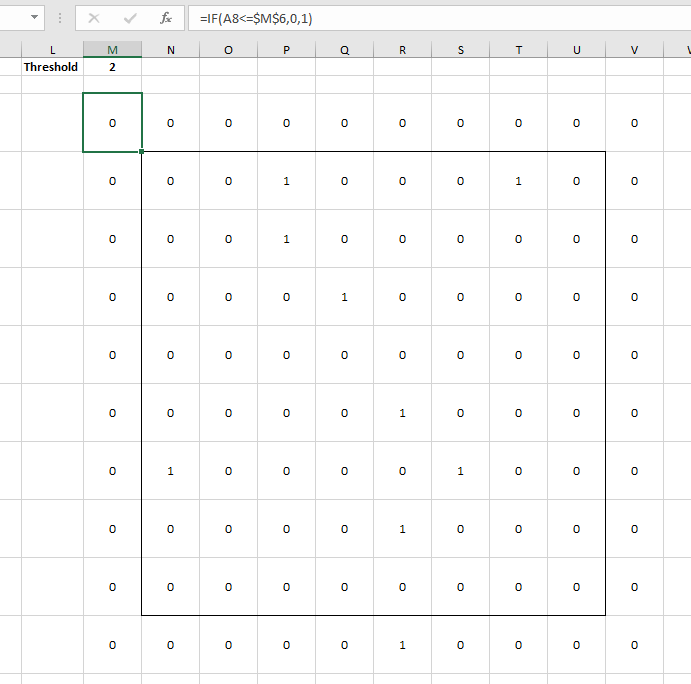

Note that cell A8 is the beginning of the first grid. So I just used this same formula across each each row and column for the second grid. Cell M6 is the threshold cell, and every cell in the new grid is referenced to that one. It's a simple toggle, and allowed to me see which threshold made the most sense. In this case, any value less than or equal to 2 was changed to a 0 (white), and any value greater than 2 was changed to a 1 (black).

Finally, to identify and label the minutiae, I made a hard copy of the newly created grid. Then, I changed any point with a 1 to a black square to make it easier to identify. Based on the results of Question 4, I labeled what I thought would be the appropriate minutiae based on 3x3 grids, or close to it.

Blue is Termination
Orange is Non-minutiae
Purple is Bifurcation

See final results below:

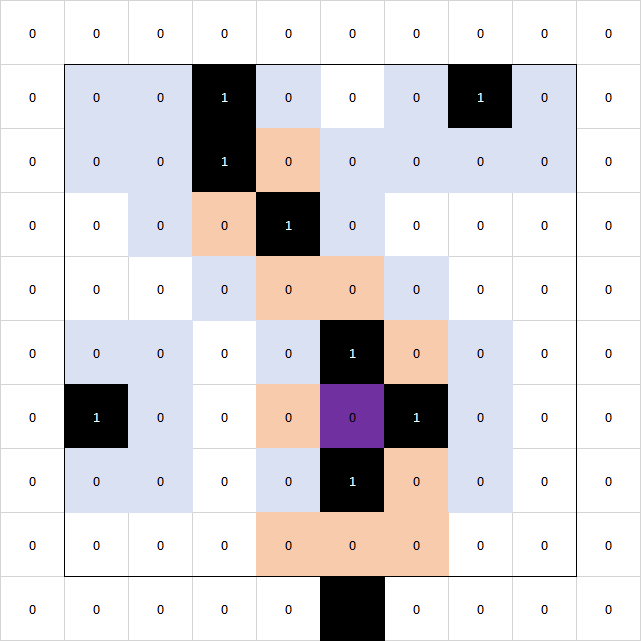